# Imports

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from scipy import optimize as opt

# Model Preparation

## Plot data

In [224]:
def plot_data(X, Y, m):
    positive_indices = Y == 1
    negative_indices = Y == 0
    
    positive_indices = positive_indices.flatten()
    negative_indices = negative_indices.flatten()
    
    positive_examples = X[positive_indices]
    negative_examples = X[negative_indices]
    
    plt.scatter(positive_examples[:, 0], positive_examples[:, 1], label = 'Positive examples', marker = 'o', color = 'green')
    plt.scatter(negative_examples[:, 0], negative_examples[:, 1], label = 'Negative examples', marker = 'x', color = 'red')
    
    plt.xlabel('First feature')
    plt.ylabel('Second feature')
    
    plt.legend(bbox_to_anchor = (1,1))
    plt.show()
    

## Sigmoid function

In [225]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## Cost computation sub-routine

In [226]:
def compute_cost(theta, X, Y, lambda_reg, m):
    
    htheta_vector = sigmoid(np.dot(X, theta))
    
    J = (-1/m) * np.sum((Y * np.log(htheta_vector)) + ((1-Y) * np.log(1-htheta_vector)))
    
    J = J + ((lambda_reg/(2*m)) * np.sum(theta[1:]**2)) # regularizing the cost
    
    return J

## Gradient computation sub-routine

In [227]:
def compute_gradient(theta, X, Y, lambda_reg, m):
    
    htheta_vector = sigmoid(np.dot(X,theta))
    
    error_vector = htheta_vector - Y
    
    gradient_vector = (1/m) * np.dot(X.T, error_vector)
    
    return gradient_vector.flatten()
    

## Decision boundary

In [ ]:
def plot_decision_boundary():
    pass # implementation to be done later

## Main function

In [228]:
def main():
    df = read_csv('data2.csv', header = None)
    
    data = df.values
    
    X = data[:, 0:2]
    m = X.shape[0]
    n = X.shape[1]
    
    Y = data[:,-1]
    Y = Y.reshape(m, 1)
#     print('Y:\n' + str(Y))
    
    plot_data(X, Y, m)
    
    ones = np.ones(shape = (m,1))
    X_with_bias = np.concatenate([ones, X], axis = 1)
#     print('Biased X:\n' + str(X_with_bias))
    
    lambda_reg = 1 # regularization factor
    
    theta = np.zeros(shape = (n+1,1))
    
    J = compute_cost(theta, X_with_bias, Y, lambda_reg, m)
    gradient = compute_gradient(theta, X_with_bias, Y, lambda_reg, m)
    print('The cost is: ' + str(J))
    
    result = opt.minimize(compute_cost, theta.flatten(), args = (X_with_bias, Y.flatten(), lambda_reg, m), method = None, jac = compute_gradient, options={'maxiter':400})

    theta = result['x']
    print('Optimum theta: ' + str(theta))
    
    plot_decision_boundary() # to be implemented
    

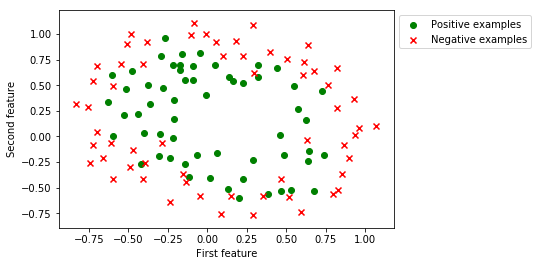

The cost is: 0.6931471805599454
Optimum theta: [-0.01213421 -0.3001537  -0.01484668]


In [229]:
if __name__ == '__main__':
    main()